# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint

### Not for Grading

#  Word Arithmetic

In [ ]:
#@title Case Study Walkthrough
from IPython.display import HTML

HTML("""<video width="320" height="240" controls>
  <source src="https://cdn.talentsprint.com/talentsprint/archives/sc/aiml/aiml_2018_b7_hyd/preview_videos/queen_king_man_woman.mp4">
</video>
""")


#### Man = Queen - King + Women

We saw a naive way to represent words as dense vectors which can leverage the semantics of the words in the class.

The problem with count-based word representations is that they are costly in terms of memory to compute large co-occurrence matrices. Let us see another method to find representations of words without explicitly counting words.

Here, we aim to predict the next word given the context in which the word appears. (For example, given the last $n$ words, predict the next word). A very smart way to do this is by using a feature representation called "Word2Vec" with transforms each word into 300-dimensional vectors.

### Setup Steps

In [5]:
#@title Please enter your registration id to start: { run: "auto", display-mode: "form" }
Id = "2100121" #@param {type:"string"}


In [3]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "5142192291" #@param {type:"string"}


In [6]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython

ipython = get_ipython()
  
notebook= "CS_U2W7_00_Word_Arithmetic" #name of the notebook
Answer = "Ungraded"
def setup():
    ipython.magic("sx wget https://www.dropbox.com/s/fm7nvhyvekhaka4/AIML_DS_WORD2VEC2D_STD.pkl.zip?dl=1")
    ipython.magic("sx mv AIML_DS_WORD2VEC2D_STD.pkl.zip?dl=1 AIML_DS_WORD2VEC2D_STD.pkl.zip")
    ipython.magic("sx unzip AIML_DS_WORD2VEC2D_STD.pkl.zip")
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    
    ipython.magic("notebook -e "+ notebook + ".ipynb")
    
    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:        
        print(r["err"])
        return None        
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None

    elif getAnswer() and getComplexity() and getAdditional() and getConcepts():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional, 
              "concepts" : Concepts, "record_id" : submission_id, 
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "feedback_experiments_input" : Comments, "notebook" : notebook}

      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:        
        print(r["err"])
        return None   
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://aiml.iiith.talentsprint.com/notebook_submissions")
        # print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
      return submission_id
    else: submission_id
    

def getAdditional():
  try:
    if not Additional: 
      raise NameError
    else:
      return Additional  
  except NameError:
    print ("Please answer Additional Question")
    return None
def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None
  
def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None

def getAnswer():
  try:
    if not Answer:
      raise NameError 
    else: 
      return Answer
  except NameError:
    print ("Please answer Question")
    return None

def getId():
  try: 
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup 
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup()
    
else:
  print ("Please complete Id and Password cells before running setup")


Setup completed successfully


## Visualization

Before we go to the actual 300 dimensional vectors, let's try to explore some of the more intriguing properties of word2vec.

You have been provided with a sample of word vectors. **We have reduced the dimensionality of the 300-dimensional vectors to 2 dimensions, so that we can plot them in matplotlib.**

In [8]:
from matplotlib import pyplot as plt
import pickle
import warnings
warnings.filterwarnings("ignore")

In [11]:
def plot_values(values, labels, figsize = (8,4), c = []):
    x = []
    y = []
    for value in values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=figsize) 
    for i in range(len(labels)):
        plt.scatter(x[i],y[i], color=c[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()



#.pkl file which is already trainied file which contain two dimentional represenatation of a word
two_dim_model = pickle.load(open('AIML_DS_WORD2VEC2D_STD.pkl', 'rb'))

wv_labels = {}
for vec, word in two_dim_model:
    wv_labels[word] = vec

We have given you the 2D representation of different word vectors. Plot the word vectors for the words 'King', 'Queen', 'man', 'women', 'Germany', 'France', 'Berlin', 'Paris', 'best', 'good', 'strong', 'strongest' in green color:

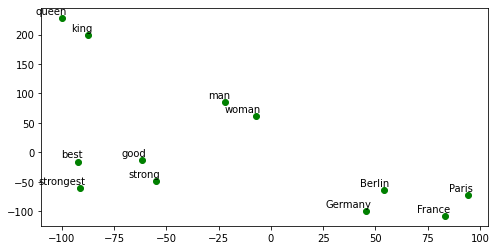

In [21]:
wv_list = ['king', 'queen', 'man', 'woman', 'Germany', 'France', 'Berlin', 'Paris', 'best', 'good', 'strong', 'strongest']
wv_new_labels = {}
for word in wv_list:
    wv_new_labels[word] = wv_labels[word]

colors = ['green' for i in range(len(wv_new_labels))  ]
plot_values(wv_new_labels.values(), list(wv_new_labels.keys()), c = colors)

Consider the word analogy question: "**Queen is to King, as Woman is to what?**"

To answer this question, we aim to find what the difference between a "King" and "Queen" is, and apply that difference to a "Woman". If we try to put this mathematically, we can write:- 
$$
 Answer = Queen - King + Woman
$$

Compute the value of the vector on the right hand side of the above equation and plot the resulting vector in red in the same plot as before. 

In [22]:
print("wv_new_labels['queen']  - wv_new_labels['king'] + wv_new_labels['woman']")
print(wv_new_labels['queen'] , ' ',wv_new_labels['king'], ' ', wv_new_labels['woman'])

wv_new_labels['queen']  - wv_new_labels['king'] + wv_new_labels['woman']
[-100.098526  227.57243 ]   [-87.6883  198.91006]   [-7.277442 61.951393]


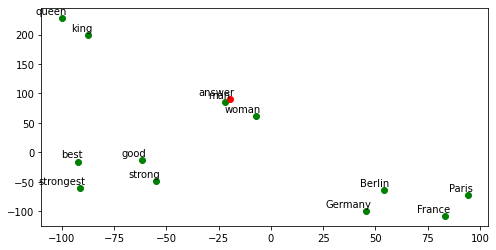

In [26]:
answer = wv_new_labels['queen']  - wv_new_labels['king'] + wv_new_labels['woman']

wv_new_labels['answer'] = answer

colors = ['green' if word not in ['answer'] else 'red' for word in wv_new_labels]

plot_values(wv_new_labels.values(), list(wv_new_labels.keys()), c = colors)

Notice how the answer vector is very close to the vector of the word "Man"? Incidentally, "Man" is the right answer to the word analogy question! This is the power of Word2Vec representations.

## Please answer the questions below to complete the experiment:

In [27]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Good, But Not Challenging for me" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [28]:
#@title If it was too easy, what more would you have liked to be added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "nn" #@param {type:"string"}


In [29]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["","Yes", "No"]


In [30]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [31]:
#@title Run this cell to submit your notebook  { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id =return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Your submission is successful.
Ref Id: 7952
Date of submission:  20 Oct 2020
Time of submission:  04:48:35
View your submissions: https://aiml.iiith.talentsprint.com/notebook_submissions
